# Part A: Linear Regression

* Explore and import Boston Dataset

In [52]:
from sklearn import datasets
import numpy as np
import warnings 


## Avoid printing out warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    mainDataset = datasets.load_boston()

X = np.array(mainDataset.data)
y = np.array(mainDataset.target)
print(f"The Boston dataset has the following shape: {X.shape}")
print(f"The Boston dataset target has the following shape: {y.shape}")

y[0]


The Boston dataset has the following shape: (506, 13)
The Boston dataset target has the following shape: (506,)


24.0

## Closed Form Solution 

* The closed form solution essentially allows us to focus on finding the unknowns of the simple linear equation:
       
       y = B1x + B0 (in our case it goes to B13)
     
* Thus the closed form solution is essentially the normal equation for linear regression which is derived by minimizing the mean squared error.

* The normal equation requires us to express our data as a matrix of m rows and n+1 columns. The extra column is added to allows our data to not be restricted to pass through the origin (0,0) and adds a bias metric to it and keeps the coeefficient of x0 to 1 (simplistic).

* Mathematically, the normal equation can be expressed as:  
        

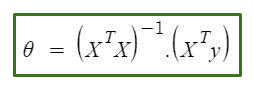

* Once we get the theta, we can use it to make our simple equation: 
    * y = B1x + B0 or y = transposed_theta * X 
* This will allow us to create a simple model whose performance we can then test with the k-fold cross validation techinque

In [53]:
# first we need to add one to our X matrix

numRows = X.shape[0]
oneColumn = np.ones((numRows,1))
X = np.c_[oneColumn,X]

In [54]:
print(f"After Adding one Column, X shape: {X.shape}")
X[0]

After Adding one Column, X shape: (506, 14)


array([1.000e+00, 6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01,
       6.575e+00, 6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01,
       3.969e+02, 4.980e+00])

In [55]:
# now we need to find out theta (ie. our weights) for this we can use the inverse and transpose function from numpy
from numpy.linalg import inv

def weightsNormalEquation(X,y):
    transpose = np.transpose(X)
    termOne = inv(np.dot(transpose,X))
    termTwo = np.dot(transpose,y)
    theta = np.dot(termOne,termTwo)
    return theta

In [56]:
weight = weightsNormalEquation(X,y)

In [57]:
weight

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

### Using K-Fold Cross Validation

* Now we can utilize k-fold cross validation technique to see how good our model is. 
* This technique essentially allows us to train and evaluate on all parts of the data by splitting data into K equal parts and testing on them K number of times.

In [95]:
# to do the performance analysis we will be making a function that performs K-fold cross validation by utilizing K-Fold from scikit-learn
from sklearn.model_selection import KFold

# this function will return to us the average recorded scores of the test and training dataset
def kFoldCrossValidation(X,y):
    kf = KFold(n_splits = 10)
    
    trainError = []
    testError = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        thetas = weightsNormalEquation(X_train,y_train)
        
        yTrainPredicted = np.dot(X_train,thetas)
        yTestPredicted = np.dot(X_test,thetas)
        
        #now that we have the predicted values we can compute the root mean squared errors using the formula: 
        # root(mean(y-yPredicted)^2)
        # we use rmse instead of mse as then the error will be in the same unit as our target
        
        rmseTrain = np.sqrt(np.mean((y_train - yTrainPredicted)**2))
        rmseTest = np.sqrt(np.mean((y_test - yTestPredicted)**2))
        
        trainError.append(rmseTrain)
        testError.append(rmseTest)
    
    avgTrainScore = np.mean(trainError)
    avgTestScore = np.mean(testError)
    
    print(f"The Average Train Recorded Score is {avgTrainScore}")
    print(f"The Average Test Recorded Score is {avgTestScore}")
        

In [96]:
kFoldCrossValidation(X,y)

The Average Train Recorded Score is 4.609066917948424
The Average Test Recorded Score is 5.18084567934023


In [89]:
# just to compare test results
print(f"Average Target Score: {np.mean(y)}")

Average Target Score: 22.532806324110677


* Inference
    * As we can see we have a greater testing error than training error this may indicate that our current model might be overfitting data
    * Furthermore our training error is about 25% of the mean of our target data which seems to be a lot 
    * Our model is off by about around \$5000 when it comes to predicting housing prices

## Ridge Regression

* Ridge regression is a regularization method that we will be using to improve our models performance.
* With ridge regression we can attempt to lessen the overfitting of our model and penalize it more for its errors.
* The penalty term for ridge regression is the shrinkage penalty (coeeficient square).
* The normal equation for ridge regression can be expressed as the following:

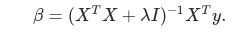

In [91]:
# in order to obtain the coefficients for ridge regression we can create a function that takes in lambda and the data and target and returns the weight vector

def weightsNormalRidge(lam, X, y):
    numCols = X.shape[1]
    transpose = np.transpose(X)
    termOne = np.dot(transpose,X) + (lam*np.identity(numCols))
    termTwo = np.dot(transpose,y)
    return np.dot(inv(termOne),termTwo)

In [92]:
weightsNormalRidge(10,X,y)

array([ 2.99308584, -0.09383025,  0.05095982, -0.01636337,  2.14511078,
       -0.50198021,  5.45139998, -0.00628537, -0.95927176,  0.18578046,
       -0.01043664, -0.41277247,  0.01462951, -0.45437374])

In [93]:
# to get different values of lambdas
lambdaValues = np.logspace(1, 7, num=13)

In [94]:
lambdaValues

array([1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07])

In [139]:
# we can now use k-fold cross validation with the rmse performance analysis metric to choose the best lambda 


def kFoldCrossValidationRidge(lam,X,y,trainList = [],testList = []):
    kf = KFold(n_splits = 10)
    
    trainError = []
    testError = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        thetas = weightsNormalRidge(lam,X_train,y_train)
        
        yTrainPredicted = np.dot(X_train,thetas)
        yTestPredicted = np.dot(X_test,thetas)
        
        #now that we have the predicted values we can compute the root mean squared errors using the formula: 
        # root(mean(y-yPredicted)^2)
        
        rmseTrain = np.sqrt(np.mean((y_train - yTrainPredicted)**2))
        rmseTest = np.sqrt(np.mean((y_test - yTestPredicted)**2))
        
        trainError.append(rmseTrain)
        testError.append(rmseTest)
    
    avgTrainScore = np.mean(trainError)
    avgTestScore = np.mean(testError)
    
    print(f"The Average Train Recorded Score is {avgTrainScore}")
    print(f"The Average Test Recorded Score is {avgTestScore}")
    
    trainList.append(avgTrainScore)
    testList.append(avgTestScore)

In [140]:
# going through each lambda value and calcultating recorded scores for them

lambdaTrainScores = []
lambdaTestScores = []

for l in lambdaValues:
    print(f"Lambda Value {l}: ")
    kFoldCrossValidationRidge(l,X,y,lambdaTrainScores,lambdaTestScores)
    print()

Lambda Value 10.0: 
The Average Train Recorded Score is 4.8354231788975
The Average Test Recorded Score is 4.886339306390932

Lambda Value 31.622776601683793: 
The Average Train Recorded Score is 4.884941156626537
The Average Test Recorded Score is 4.962596168933465

Lambda Value 100.0: 
The Average Train Recorded Score is 5.034280506060113
The Average Test Recorded Score is 5.305449602680708

Lambda Value 316.22776601683796: 
The Average Train Recorded Score is 5.487423603098882
The Average Test Recorded Score is 6.17747543196394

Lambda Value 1000.0: 
The Average Train Recorded Score is 6.141155057881077
The Average Test Recorded Score is 7.204962101315877

Lambda Value 3162.2776601683795: 
The Average Train Recorded Score is 6.6813626855160635
The Average Test Recorded Score is 7.854903696023331

Lambda Value 10000.0: 
The Average Train Recorded Score is 7.209535034086183
The Average Test Recorded Score is 8.242326310824097

Lambda Value 31622.776601683792: 
The Average Train Record

In [141]:
print(f"Minimum Lambda Train Score Value: {min(lambdaTrainScores)} - for lambda: {lambdaValues[lambdaTrainScores.index(min(lambdaTrainScores))]}")
print(f"Minimum Lambda Test Score Value: {min(lambdaTestScores)} - for lambda: {lambdaValues[lambdaTrainScores.index(min(lambdaTrainScores))]}")

Minimum Lambda Train Score Value: 4.8354231788975 - for lambda: 10.0
Minimum Lambda Test Score Value: 4.886339306390932 - for lambda: 10.0


* Hence, the best lambda is 10

In [142]:
# Performance Estimation for best lambda
print(f"Lambda Value: 10")
kFoldCrossValidationRidge(10,X,y)

Lambda Value: 10
The Average Train Recorded Score is 4.8354231788975
The Average Test Recorded Score is 4.886339306390932


## Degree Two Polynomial Features

* Trying out polynomial regression to get better coefficients (weight) and to uncover if there is any synergy amongst the features

In [143]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=True)
polynomial_converter.fit(np.array(mainDataset.data))

PolynomialFeatures()

In [144]:
mainData = np.array(mainDataset.data)
poly_features = polynomial_converter.transform(mainData)
poly_features.shape

(506, 105)

In [145]:
mainData.shape

(506, 13)

In [146]:
y.shape

(506,)

In [147]:
# now doing kfold cross validation to identify the best lambda for polynomial regression

polyLambdaTrain = []
polyLambdaTest = []

for l in lambdaValues:
    print(f"Lambda Value {l}: ")
    kFoldCrossValidationRidge(l,poly_features,y,polyLambdaTrain,polyLambdaTest)
    print()


Lambda Value 10.0: 
The Average Train Recorded Score is 2.560086944334837
The Average Test Recorded Score is 6.191736969117406

Lambda Value 31.622776601683793: 
The Average Train Recorded Score is 2.641643264664011
The Average Test Recorded Score is 6.170186264528799

Lambda Value 100.0: 
The Average Train Recorded Score is 2.727438866426298
The Average Test Recorded Score is 6.262518410492431

Lambda Value 316.22776601683796: 
The Average Train Recorded Score is 2.806139642905879
The Average Test Recorded Score is 6.3972470152159655

Lambda Value 1000.0: 
The Average Train Recorded Score is 2.8897071380280805
The Average Test Recorded Score is 6.4154664055651835

Lambda Value 3162.2776601683795: 
The Average Train Recorded Score is 2.983992390163462
The Average Test Recorded Score is 6.303247677585791

Lambda Value 10000.0: 
The Average Train Recorded Score is 3.074840108962867
The Average Test Recorded Score is 6.134519394544973

Lambda Value 31622.776601683792: 
The Average Train R

In [148]:
print(f"Minimum Lambda Train Score Value: {min(polyLambdaTrain)} - for lambda: {lambdaValues[polyLambdaTrain.index(min(polyLambdaTrain))]}")
print(f"Minimum Lambda Test Score Value: {min(polyLambdaTest)} - for lambda: {lambdaValues[polyLambdaTest.index(min(polyLambdaTest))]}")

Minimum Lambda Train Score Value: 2.560086944334837 - for lambda: 10.0
Minimum Lambda Test Score Value: 5.093512652742837 - for lambda: 1000000.0


* Here our focus is to reduce overfitting, thus the best lambda is 100000 as the error discrepancy between the training and testing data is not a lot

In [150]:
# Performance Estimation for best lambda
print(f"Lambda Value: 1000000")
kFoldCrossValidationRidge(1000000,poly_features,y)

Lambda Value: 1000000
The Average Train Recorded Score is 3.6808287984512846
The Average Test Recorded Score is 5.093512652742837


## Multivariate Linear Regression - Gradient Descent Method

* The gradient descent is an optimization algorithm allowing us to minimize the cost function faster.
* To prepare for gradient descent, it is better if we can scale our data first so that we can reach the minimum faster
* The gradient vector for the cost function is as follows:

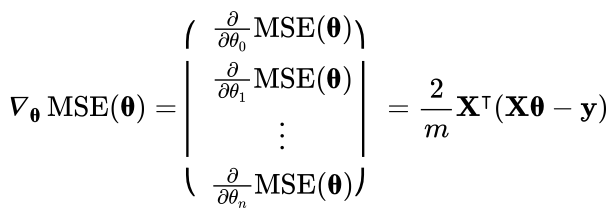

* Gradient Descent also introduces additional parameters such as the learning rate and the number of iterations, in order to hypertune them we can deploy k-fold cross validation

* The gradient descent step is calculated as follows:

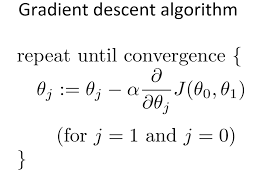

In [191]:
# first we need to feature scale our data to make it ready for gradient descent
# before feature scaling we need to split it to avoid data leakage
# Standardizing Data with Z-Score Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mainData, y, test_size=0.3, random_state=10)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [192]:
scaledData = scaler.transform(mainData)

In [193]:
scaledData

array([[-0.43055341,  0.27857825, -1.32566533, ..., -1.51638705,
         0.4497093 , -1.13515486],
       [-0.427977  , -0.47088369, -0.64079331, ..., -0.35498286,
         0.4497093 , -0.54404779],
       [-0.42797945, -0.47088369, -0.64079331, ..., -0.35498286,
         0.4066316 , -1.27014326],
       ...,
       [-0.42387117, -0.47088369,  0.05846677, ...,  1.1316145 ,
         0.4497093 , -1.04137345],
       [-0.41787753, -0.47088369,  0.05846677, ...,  1.1316145 ,
         0.41319381, -0.92201529],
       [-0.42550982, -0.47088369,  0.05846677, ...,  1.1316145 ,
         0.4497093 , -0.72308502]])

In [194]:
y.shape

(506,)

In [195]:
#adding bias to scaled X
numRows = scaledData.shape[0]
oneColumn = np.ones((numRows,1))
scaledData = np.c_[oneColumn,scaledData]

In [196]:
scaledData.shape

(506, 14)

In [197]:
# we also need to reshape our y to match with the dimension of the target values
reshapedY = np.reshape(y,(len(y),1))

In [198]:
reshapedY.shape

(506, 1)

In [199]:
# now we can create a gradient descent function that intializes the theta with random values first and then perfoms 1000 iterations to reach the minima

def gradientDescent(X,y,learningRate,iterations=1000):
    theta = np.random.randn(X.shape[1], 1)
    m = X.shape[0]
    
    for i in range(iterations):
        transpose = np.transpose(X)
        termOne = (2/m) * transpose
        termSecond = np.dot(X,theta) - y
        gradient = np.dot(termOne,termSecond)
        theta = theta - learningRate * gradient 
    return theta

In [200]:
learningRateValues = np.logspace(-11,-1, num=11)

In [201]:
def kFoldCrossValidationGD(eta,X,y,trainList = [],testList = []):
    kf = KFold(n_splits = 10)
    
    trainError = []
    testError = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        thetas = gradientDescent(X_train,y_train,eta)
        
        yTrainPredicted = np.dot(X_train,thetas)
        yTestPredicted = np.dot(X_test,thetas)
        
        #now that we have the predicted values we can compute the root mean squared errors using the formula: 
        # root(mean(y-yPredicted)^2)
        
        rmseTrain = np.sqrt(np.mean((y_train - yTrainPredicted)**2))
        rmseTest = np.sqrt(np.mean((y_test - yTestPredicted)**2))
        
        trainError.append(rmseTrain)
        testError.append(rmseTest)
    
    avgTrainScore = np.mean(trainError)
    avgTestScore = np.mean(testError)
    
    print(f"The Average Train Recorded Score is {avgTrainScore}")
    print(f"The Average Test Recorded Score is {avgTestScore}")
    
    trainList.append(avgTrainScore)
    testList.append(avgTestScore)

In [202]:
gdTrain = []
gdTest = []

for l in learningRateValues:
    print(f"Learning Rate Value {l}: ")
    kFoldCrossValidationGD(l,scaledData,reshapedY,gdTrain,gdTest)
    print()


Learning Rate Value 1e-11: 
The Average Train Recorded Score is 24.741657835704054
The Average Test Recorded Score is 24.63537260205475

Learning Rate Value 1e-10: 
The Average Train Recorded Score is 24.403844621334876
The Average Test Recorded Score is 23.818774856187936

Learning Rate Value 1e-09: 
The Average Train Recorded Score is 24.38001125207915
The Average Test Recorded Score is 22.49197269480133

Learning Rate Value 1e-08: 
The Average Train Recorded Score is 24.72878066508496
The Average Test Recorded Score is 23.42647888192202

Learning Rate Value 1e-07: 
The Average Train Recorded Score is 23.99484943154626
The Average Test Recorded Score is 24.640993406781952

Learning Rate Value 1e-06: 
The Average Train Recorded Score is 24.482937547476133
The Average Test Recorded Score is 24.21541374512311

Learning Rate Value 1e-05: 
The Average Train Recorded Score is 23.596445400024226
The Average Test Recorded Score is 23.289385247237252

Learning Rate Value 0.0001: 
The Average 

In [264]:
# Performance Estimation for best lambda
print(f"Learning Rate Value 0.01: ")
kFoldCrossValidationGD(0.01,scaledData,reshapedY)

Learning Rate Value 0.01: 
The Average Train Recorded Score is 4.6191743653907
The Average Test Recorded Score is 5.140297932136469


## Lasso Regression

* This is another regularization method characterized with the following formula


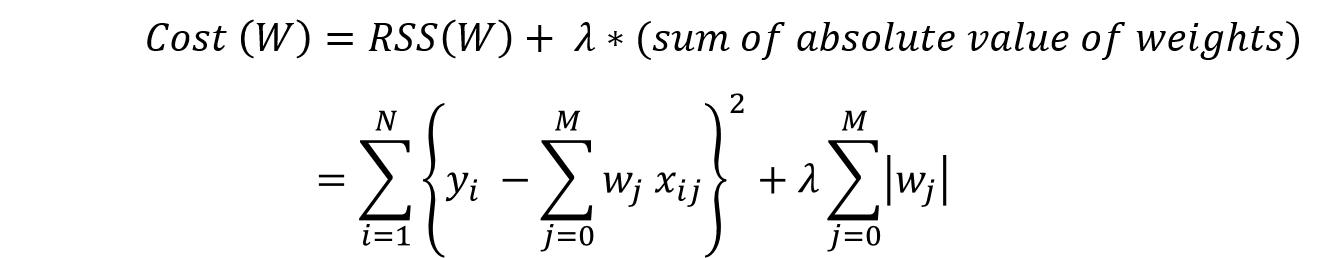

In [242]:
# we can create a ls function that returns the appropriate coefficients with the paramaters being lambda, learning rate, number of iterations and the dataset

def lassoRegression(lam,learningRate,X,y,iterations = 2500):
    theta = np.random.randn(X.shape[1], 1)
    m = X.shape[0]
    
    for i in range(iterations):
        transpose = np.transpose(X)
        termOne = (2/m) * transpose
        termSecond = np.dot(X,theta) - y
        penalty = lam*(np.sign(theta))
        gradient = np.dot(termOne,termSecond) + penalty
        theta = theta - learningRate * gradient 
    return theta

In [243]:
def kFoldCrossValidationLasso(lam,eta,X,y,trainList = [],testList = []):
    kf = KFold(n_splits = 10)
    
    trainError = []
    testError = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        thetas = lassoRegression(lam,eta,X_train,y_train)
        
        yTrainPredicted = np.dot(X_train,thetas)
        yTestPredicted = np.dot(X_test,thetas)
        
        #now that we have the predicted values we can compute the root mean squared errors using the formula: 
        # root(mean(y-yPredicted)^2)
        
        rmseTrain = np.sqrt(np.mean((y_train - yTrainPredicted)**2))
        rmseTest = np.sqrt(np.mean((y_test - yTestPredicted)**2))
        
        trainError.append(rmseTrain)
        testError.append(rmseTest)
    
    avgTrainScore = np.mean(trainError)
    avgTestScore = np.mean(testError)
    
    print(f"The Average Train Recorded Score is {avgTrainScore}")
    print(f"The Average Test Recorded Score is {avgTestScore}")
    
    trainList.append(avgTrainScore)
    testList.append(avgTestScore)

In [250]:
# now doing kfold cross validation to identify the best lambda 

lassoLambdaTrain = []
lassoLambdaTest = []

lassolambdaValues = np.logspace(-5, 3, num=9)

for l in lassolambdaValues:
    print(f"Lambda Value {l}: ")
    kFoldCrossValidationLasso(l,0.001,scaledData,reshapedY,lassoLambdaTrain,lassoLambdaTest)
    print()

Lambda Value 1e-05: 
The Average Train Recorded Score is 4.74796442801407
The Average Test Recorded Score is 5.1440959587653685

Lambda Value 0.0001: 
The Average Train Recorded Score is 4.743783465002425
The Average Test Recorded Score is 5.4041791147915665

Lambda Value 0.001: 
The Average Train Recorded Score is 4.7654141620666435
The Average Test Recorded Score is 5.2464322191199875

Lambda Value 0.01: 
The Average Train Recorded Score is 4.7488318215472045
The Average Test Recorded Score is 5.165215561151985

Lambda Value 0.1: 
The Average Train Recorded Score is 4.76385349877634
The Average Test Recorded Score is 5.13160583666603

Lambda Value 1.0: 
The Average Train Recorded Score is 5.0549295647094326
The Average Test Recorded Score is 5.1528859391921245

Lambda Value 10.0: 
The Average Train Recorded Score is 9.0946878745205
The Average Test Recorded Score is 8.678532508521196

Lambda Value 100.0: 
The Average Train Recorded Score is 24.276680992322845
The Average Test Recorde

In [251]:
print(f"Minimum Lambda Train Score Value: {min(lassoLambdaTrain)} - for lambda: {lassolambdaValues[lassoLambdaTrain.index(min(lassoLambdaTrain))]}")
print(f"Minimum Lambda Test Score Value: {min(lassoLambdaTest)} - for lambda: {lassolambdaValues[lassoLambdaTest.index(min(lassoLambdaTest))]}")

Minimum Lambda Train Score Value: 4.743783465002425 - for lambda: 0.0001
Minimum Lambda Test Score Value: 5.13160583666603 - for lambda: 0.1


In [252]:
# Performance Estimation for best lambda
print(f"Lambda Value: 0.1")
kFoldCrossValidationLasso(0.1,0.001,scaledData,reshapedY)

Lambda Value: 0.1
The Average Train Recorded Score is 4.763833786559007
The Average Test Recorded Score is 5.0391726298692365


## Elastic Net Regression

* A regularization algorithm that is a combination of ridge and lasso and has the followig formula:

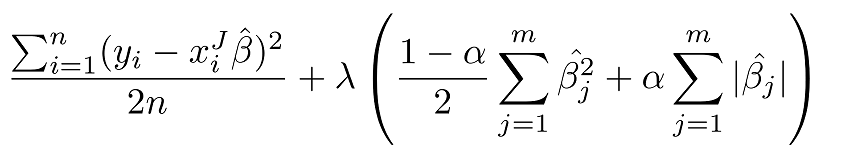

In [254]:
# we can create a ls function that returns the appropriate coefficients with the paramaters being r, lambda, learning rate, number of iterations and the dataset

def elasticRegression(lam,learningRate,X,y,iterations = 2500,r=0.5):
    theta = np.random.randn(X.shape[1], 1)
    m = X.shape[0]
    
    for i in range(iterations):
        transpose = np.transpose(X)
        termOne = (2/m) * transpose
        termSecond = np.dot(X,theta) - y
        penalty = lam*(r*(np.sign(theta)) + (1-r)*theta) 
        gradient = np.dot(termOne,termSecond) + penalty
        theta = theta - learningRate * gradient 
    return theta

In [256]:
def kFoldCrossValidationElastic(lam,eta,X,y,trainList = [],testList = []):
    kf = KFold(n_splits = 10)
    
    trainError = []
    testError = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        thetas = elasticRegression(lam,eta,X_train,y_train)
        
        yTrainPredicted = np.dot(X_train,thetas)
        yTestPredicted = np.dot(X_test,thetas)
        
        #now that we have the predicted values we can compute the root mean squared errors using the formula: 
        # root(mean(y-yPredicted)^2)
        
        rmseTrain = np.sqrt(np.mean((y_train - yTrainPredicted)**2))
        rmseTest = np.sqrt(np.mean((y_test - yTestPredicted)**2))
        
        trainError.append(rmseTrain)
        testError.append(rmseTest)
    
    avgTrainScore = np.mean(trainError)
    avgTestScore = np.mean(testError)
    
    print(f"The Average Train Recorded Score is {avgTrainScore}")
    print(f"The Average Test Recorded Score is {avgTestScore}")
    
    trainList.append(avgTrainScore)
    testList.append(avgTestScore)

In [261]:
elasticLambdaTrain = []
elasticLambdaTest = []

elasticlambdaValues = np.logspace(-7, 3, num=11)

for l in lassolambdaValues:
    print(f"Lambda Value {l}: ")
    kFoldCrossValidationElastic(l,0.001,scaledData,reshapedY,elasticLambdaTrain,elasticLambdaTest)
    print()

Lambda Value 1e-05: 
The Average Train Recorded Score is 4.740036713577655
The Average Test Recorded Score is 5.168495139040231

Lambda Value 0.0001: 
The Average Train Recorded Score is 4.743430578417537
The Average Test Recorded Score is 5.163698392240269

Lambda Value 0.001: 
The Average Train Recorded Score is 4.735585324990197
The Average Test Recorded Score is 5.1004307308448515

Lambda Value 0.01: 
The Average Train Recorded Score is 4.759778046500959
The Average Test Recorded Score is 5.390565918123906

Lambda Value 0.1: 
The Average Train Recorded Score is 4.8137060034412364
The Average Test Recorded Score is 5.241257630196619

Lambda Value 1.0: 
The Average Train Recorded Score is 6.84255857193947
The Average Test Recorded Score is 7.977910761686881

Lambda Value 10.0: 
The Average Train Recorded Score is 18.05417550726586
The Average Test Recorded Score is 19.10695475905849

Lambda Value 100.0: 
The Average Train Recorded Score is 24.25276279073429
The Average Test Recorded 

In [262]:
print(f"Minimum Lambda Train Score Value: {min(elasticLambdaTrain)} - for lambda: {elasticlambdaValues[elasticLambdaTrain.index(min(elasticLambdaTrain))]}")
print(f"Minimum Lambda Test Score Value: {min(elasticLambdaTest)} - for lambda: {elasticlambdaValues[elasticLambdaTest.index(min(elasticLambdaTest))]}")

Minimum Lambda Train Score Value: 4.735585324990197 - for lambda: 1e-05
Minimum Lambda Test Score Value: 5.1004307308448515 - for lambda: 1e-05


In [263]:
# Performance Estimation for best lambda
print(f"Lambda Value: 0.00001")
kFoldCrossValidationElastic(0.00001,0.001,scaledData,reshapedY)

Lambda Value: 0.00001
The Average Train Recorded Score is 4.715447342492509
The Average Test Recorded Score is 5.186174551162976


* Therefore, from all the models that I have generated, I would choose the ridge regression model as it has the least rmse value for the test set. Additionally, it has the least difference between the rmse values for the training and test set showing that it has a sufficient bias-variance trade off. 
* The next best model is the lasso model with the following parameters: iterations = 2500, lambda = 0.1, learning rate = 0.001

# Part B: Logistic Regression

* Explore and import Breast Cancer Wisconsin Dataset

In [424]:
from sklearn.datasets import load_breast_cancer
logisticDataset = load_breast_cancer()

In [425]:
X = logisticDataset.data
y = logisticDataset.target

print(f"The shape of X is {X.shape}")
print(f"The shape of y is {y.shape}")

The shape of X is (569, 30)
The shape of y is (569,)


* The idea behind logistic regression is to assist us in classification and determine what is the probability that an instance belongs to a particular class.
* The main function that allows us to see values in the range of 0-1 for computing their probability is the logistic function (in this case the signmoid function) with the following equation:

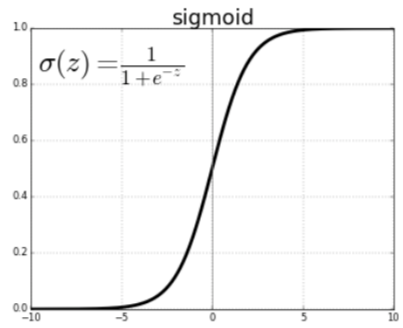

* Now to in order to ensure that our model yields high performance we have the following cost function which needs to be minimized to them give us the best weights (theta) for our model. The function is also called the logloss function

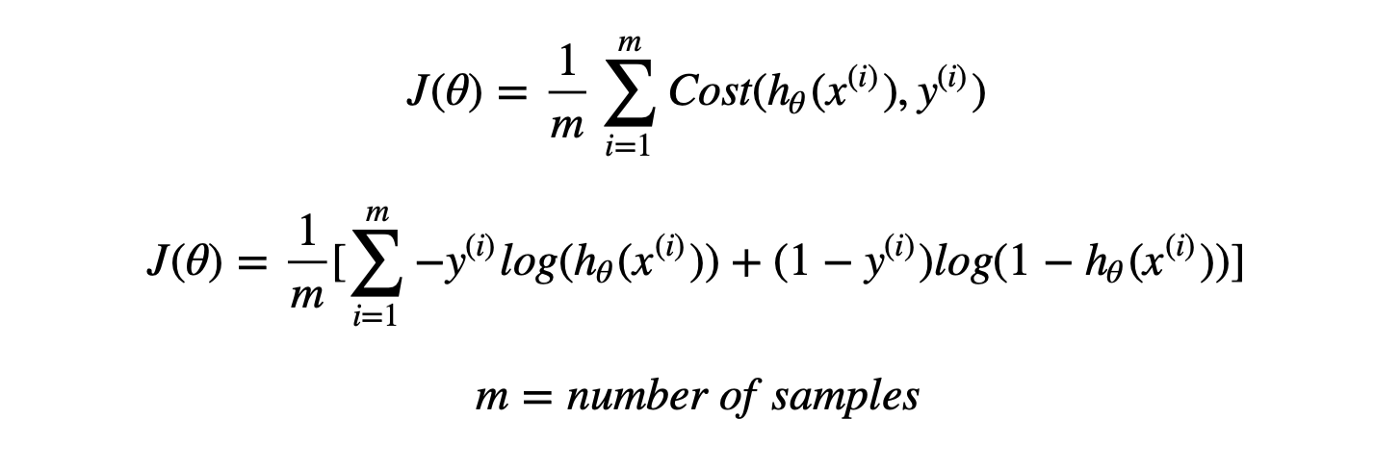

In [426]:
# lets inspect our data

print(X)
print(X.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [427]:
# as you can see the features in our data are not uniform. Thus we need to first scale our data using standardization
# standardization assists in gradient ascent
# y needs to be reshaped to to match with the dimension of the target values


y = np.reshape(y,(len(y),1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
scaler = StandardScaler()
scaler.fit(X_train)
X_train.shape

(398, 30)

In [428]:
scaledX = scaler.transform(X)

#adding bias to scaled X
numRows = scaledX.shape[0]
oneColumn = np.ones((numRows,1))
scaledX = np.c_[oneColumn,scaledX]

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.3, random_state=10)

In [429]:
print(scaledX.shape)
print(y.shape)

(569, 31)
(569, 1)


In [430]:
print(X_train.shape)
print(y_train.shape)
print(X_train)

(398, 31)
(398, 1)
[[ 1.         -0.52062492 -0.3629934  ... -0.67580898 -0.58109609
   0.51919339]
 [ 1.          1.48227672  0.92918279 ...  1.01115676 -0.54646457
  -0.45710183]
 [ 1.         -0.33854295 -1.26027307 ... -1.27089854 -1.35857381
  -1.0249867 ]
 ...
 [ 1.         -0.53743249 -1.6271296  ... -0.15948582  0.37819713
  -0.46265844]
 [ 1.         -0.11444207 -0.47281669 ... -1.0271568  -0.91355872
  -0.69047918]
 [ 1.          1.81282552  2.77748544 ...  0.75377045 -0.04084432
  -0.11481506]]


* For gradient ascent, we can focus on the following function to find the next theta and subsequently reach the maxima

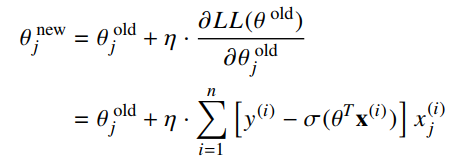

In [431]:
# lets build gradient ascent

# first we will need the logsitic function

def logistic(z):
    value = 1/(1+np.exp(-z))
    return value

# next we need to build the logloss function as we will then be using it for a plot
numpy.seterr(divide = 'ignore') 
numpy.seterr(invalid = 'ignore') 
def logLoss(X,y,theta):
    m= X.shape[0]
    estimatedProbability = logistic(np.dot(X,theta))
    termOne = y * np.log(estimatedProbability)
    termTwo = (1-y) * np.log(1-estimatedProbability)
    logloss = 1/m*(np.sum(termOne+termTwo))
    return logloss

# now we can build gradient ascent

trainLogLikelihoodValues = []
testLogLikelihoodValues = []

def gradientAscent(X,y,learningRate=0.5,iterations = 5000,threshold=0.5):
    theta = np.random.randn(X.shape[1], 1)
    m = X.shape[0]
    
    for i in range(iterations):
        if i%100 == 0:
            if X.shape[0] > 171:
                trainLogLikelihoodValues.append(logLoss(X,y,theta))
            else:
                testLogLikelihoodValues.append(logLoss(X,y,theta))
        transpose = np.transpose(X)
        estimatedProbability = logistic(np.dot(X,theta))
        termOne = y-estimatedProbability
        gradient = (1/m) * np.dot(transpose,termOne)
        theta = theta + learningRate * gradient  
    return theta

In [432]:
# now we can start applying gradient ascent to get our coefficients 

trainThetas = gradientAscent(X_train,y_train)
print(f"The coefficient vector for training is {trainThetas}")


The coefficient vector for training is [[-1.21597792]
 [ 0.10971944]
 [-0.56948529]
 [ 0.13083077]
 [-0.19635414]
 [-0.04279633]
 [ 2.06763027]
 [-1.36561881]
 [-3.11906661]
 [ 0.78266729]
 [-0.09168371]
 [-5.45623288]
 [ 0.61167165]
 [-0.65120265]
 [-2.10640003]
 [-0.50188471]
 [ 2.56956211]
 [-1.04069152]
 [-1.86542171]
 [ 1.99081223]
 [ 3.02137173]
 [-2.81767484]
 [-2.57443296]
 [-0.55201879]
 [-1.31596223]
 [ 0.03665115]
 [ 0.29989269]
 [-1.80342615]
 [-0.94434096]
 [-1.6068173 ]
 [-2.65030525]]


In [433]:
# now we can start applying gradient ascent to get our coefficients 

testThetas = gradientAscent(X_test,y_test)
print(f"The coefficient vector for training is {testThetas}")

The coefficient vector for training is [[ 1.14668942]
 [-1.74986394]
 [-3.66337926]
 [-2.25805252]
 [-2.35341648]
 [-1.20800786]
 [-0.92514734]
 [-1.1755516 ]
 [-1.60895096]
 [ 0.8281416 ]
 [ 1.01202026]
 [-2.45304636]
 [ 2.04464644]
 [-1.67309042]
 [-2.66225511]
 [-0.8041572 ]
 [ 2.31042041]
 [-0.34493883]
 [-0.41983895]
 [-0.75710875]
 [ 1.08551069]
 [-1.97894697]
 [-0.89928436]
 [-2.54248031]
 [-1.56664225]
 [-2.04762638]
 [-0.44191527]
 [-1.65617524]
 [ 0.08270433]
 [-2.68092211]
 [-0.17290547]]


## Test Dataset Metrics

* We need to find Precision Recall F1 Score and Confusion Matrix
* For this we need to compare the predicted y values (by first classifying them into either 0 (negative) or 1 (positive) to the actual y values
* Precision = true positive / (true positive + false positive)
* Recall = true positive / (true positive + false negative)
* F1 = 2*(precision*recall) / (precision + recall)


In [434]:
# lets find predicted probabilites for the test dataset

predictedProbabilityTest = logistic(np.dot(X_test,testThetas))

In [435]:
print(predictedProbabilityTest)
print(predictedProbabilityTest.shape)

[[4.39803311e-05]
 [1.00000000e+00]
 [9.99999517e-01]
 [1.21900252e-12]
 [9.99999913e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999989e-01]
 [7.78257271e-10]
 [2.67326769e-07]
 [9.99999889e-01]
 [1.00000000e+00]
 [9.17186356e-04]
 [9.99999998e-01]
 [3.78630847e-05]
 [1.04486017e-05]
 [9.99999779e-01]
 [9.99769025e-01]
 [9.99999997e-01]
 [9.95196970e-01]
 [5.95778301e-06]
 [2.19435728e-04]
 [1.00000000e+00]
 [9.99896589e-01]
 [2.03772515e-12]
 [2.96084952e-13]
 [9.91083688e-01]
 [3.73188054e-13]
 [1.00000000e+00]
 [9.99874162e-01]
 [9.99999998e-01]
 [9.99999842e-01]
 [3.25892871e-19]
 [1.00000000e+00]
 [9.99751638e-01]
 [1.00000000e+00]
 [9.99999998e-01]
 [1.00000000e+00]
 [9.99999698e-01]
 [9.99999185e-01]
 [9.99999502e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [5.70876237e-04]
 [9.99999007e-01]
 [4.08362211e-19]
 [1.58100477e-03]
 [2.55030833e-03]
 [2.42672160e-03]
 [9.98602103e-01]
 [9.99316752e-01]
 [9.99725516e-01]
 [8.87279059e-07]
 [9.99999983e-01]
 [9.99997929e-01]
 [3.050396

In [436]:
# now we need to assign probablities as 0 or 1 on the basis that if p > 0.5 p = 1 else = 0

for i in range(predictedProbabilityTest.size):
    if predictedProbabilityTest[i] > 0.5:
        predictedProbabilityTest[i] = 1
    else:
        predictedProbabilityTest[i] = 0

print(predictedProbabilityTest)
print(predictedProbabilityTest.shape)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.

In [437]:
print(f"Y: {y_test.shape}")
print(f"X: {X_test.shape}")

Y: (171, 1)
X: (171, 31)


In [438]:
#intializing metrics 

truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

for i in range(y_test.size):
    if y_test[i] == 0 and predictedProbabilityTest[i] == 0:
        trueNegative += 1
    elif y_test[i] == 1 and predictedProbabilityTest[i] == 1:
        truePositive += 1
    elif y_test[i] == 0 and predictedProbabilityTest[i] == 1:
        falsePositive += 1
    else:
        falsNegative += 1
        
precision = truePositive / (truePositive + falsePositive)
recall = truePositive / (truePositive + falseNegative)
f1 = 2 * (precision*recall)/(precision+recall)    


print("The metrics are as follows: ")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

The metrics are as follows: 
Precision: 1.0
Recall: 1.0
F1: 1.0


In [439]:
# for the confusion matrix we can use the sklearn library 

from sklearn import metrics

cMatrix = metrics.confusion_matrix(y_test, predictedProbabilityTest)
print(cMatrix)



[[ 59   0]
 [  0 112]]


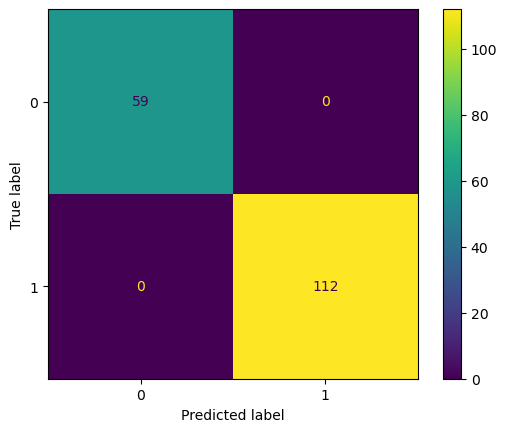

In [440]:
# we can also display the confusion matrix as a plot
import matplotlib.pyplot as plt
cMatrixPlot = metrics.ConfusionMatrixDisplay(confusion_matrix=cMatrix)
cMatrixPlot.plot()
plt.show()

## Plotting Loglikelihood Values

* In the follwing graph there will be the plots for the log likilehood values of the training and the test data.


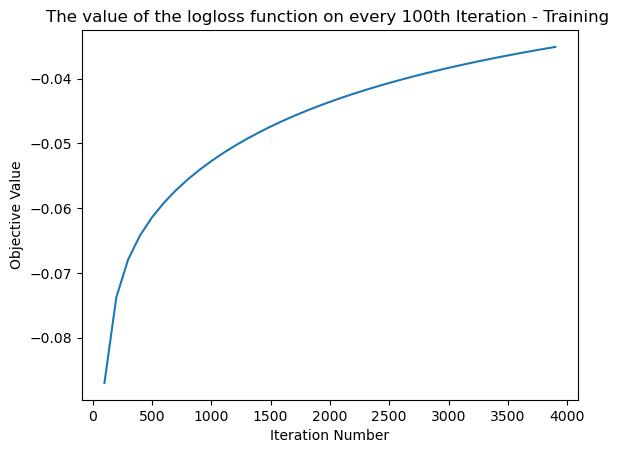

In [444]:
# for training data


plt.plot(np.array(range(0,5000,100)),trainLogLikelihoodValues)
plt.title("The value of the logloss function on every 100th Iteration - Training ")
plt.xlabel("Iteration Number")
plt.ylabel("Objective Value")
plt.show()

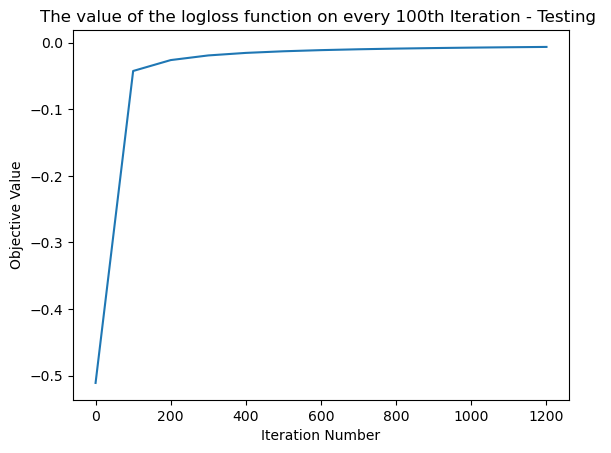

In [445]:
# for testing data


plt.plot(np.array(range(0,5000,100)),testLogLikelihoodValues)
plt.title("The value of the logloss function on every 100th Iteration - Testing ")
plt.xlabel("Iteration Number")
plt.ylabel("Objective Value")
plt.show()

In [446]:
# i will be experimenting with the following parameters:
# iteration values: 1000, 7500, 10000, 
# Learning Rate: 0.01, 0.001, 0.75

errorScores = {}

# first the default one

yPredicted = np.dot(X_test,testThetas)

rmse1 = np.sqrt(np.mean((yPredicted-y_test)**2))

errorScores["default"] = rmse1


theta1 = gradientAscent(X_test,y_test,0.01, 1000)
theta2 = gradientAscent(X_test,y_test,0.001, 7500)
theta3 = gradientAscent(X_test,y_test,0.75, 10000)

i = 1
for theta in [theta1,theta2,theta3]:
    yPredicted = np.dot(X_test,theta)
    rmse = np.sqrt(np.mean((yPredicted-y_test)**2))
    errorScores[f"Theta {i}"] = rmse
    i+=1

errorScores

{'default': 24.037054461465683,
 'Theta 1': 8.158666509761948,
 'Theta 2': 6.222342469831017,
 'Theta 3': 27.59901090877667}

* As we can see Theta 2 gave the least error, therfore the best parameters are learning rate = 0.001, iterations = 7500